In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
import tensorflow.keras.backend as K
from scipy.stats import pearsonr, spearmanr
import sys, os
sys.path.append('../python_scripts/')
import analysis, datasets, analysis_10x10# , baseline

In [3]:
'''
Load Data
'''
import datasets
_, testData = datasets.make_train_data(None)
x_predict, _ = datasets.make_predict_data(testData)

Making train data...
GCN...
ZCA...
Done!
Making test data...
Done!


In [35]:
import importlib
importlib.reload(analysis_10x10)


# 
# def correlate(method: str,
#               primary: str,
#               path_to_instances: str,
#               save_dir: str,
#               x_predict,
#               consistency='exemplar',
#               cocktail_blank=False):
correlations = analysis_10x10.correlate('RSA', 'weights', '../outputs/models/ten_by_ten_3', 'Correlations_10x10', x_predict)
# correlations = np.load('Correlations_10x10.npy')
# failures = []

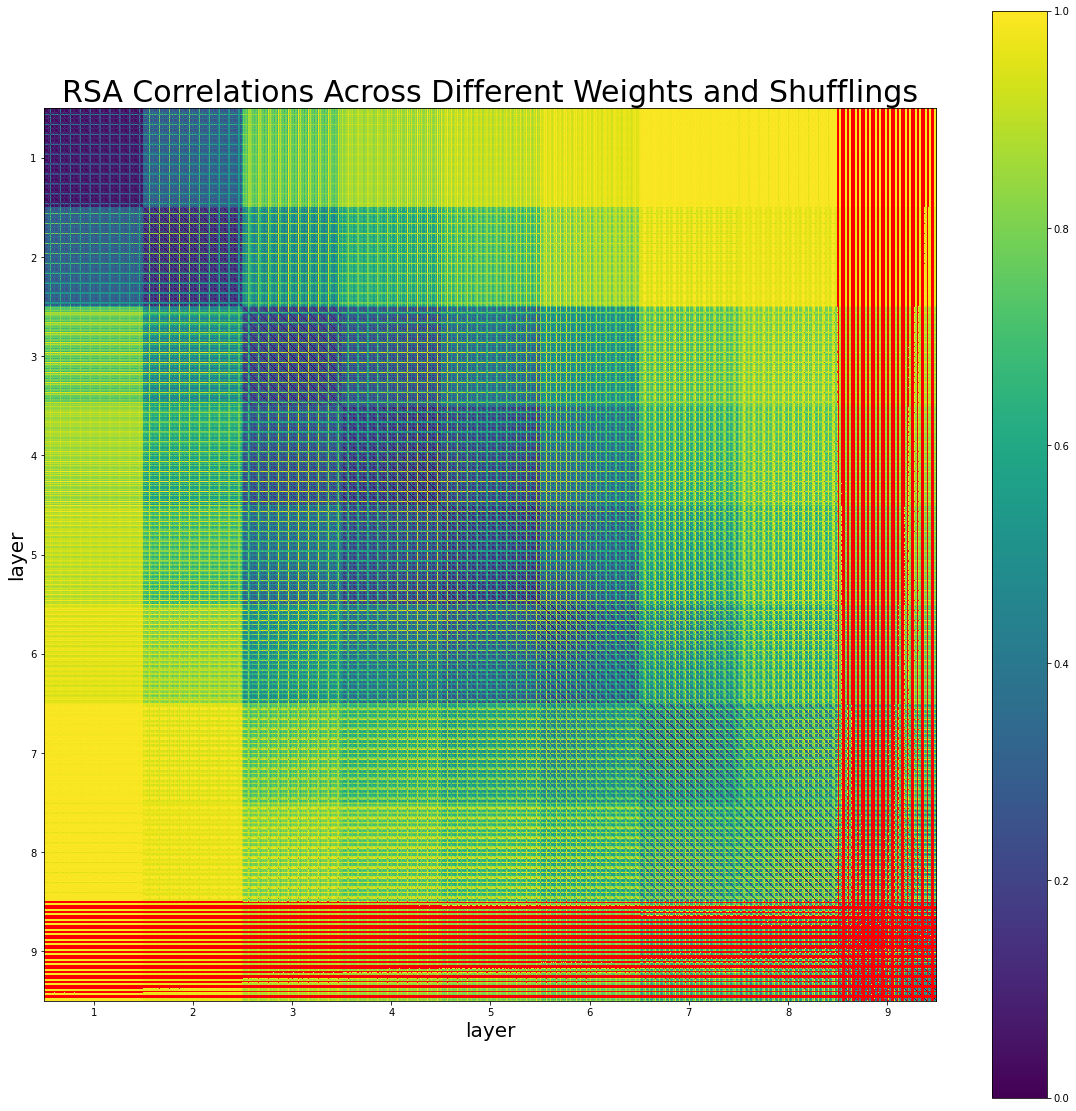

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
cmap = plt.cm.viridis
cmap.set_over('red')
plt.imshow(1-correlations)
plt.clim(vmin=0, vmax=1)

plt.xlabel('layer', fontsize=20)
plt.xticks(ticks=[50, 150, 250, 350, 450, 550, 650, 750, 850],
           labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.ylabel('layer', fontsize=20)
plt.yticks(ticks=[50, 150, 250, 350, 450, 550, 650, 750, 850],
           labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.title('RSA Correlations Across Different Weights and Shufflings', fontsize=30)

plt.colorbar()

In [ ]:
correlations_svcca = analysis_10x10.correlate('SVCCA',
                                              'weights',
                                              '../outputs/models/ten_by_ten_3',
                                              'Correlations_10x10',
                                              x_predict)

In [ ]:
np.save('../outputs/Correlations_10x10_SVCCA.npy')

In [ ]:
correlations_svcca_load = np.load('../lutputs/Correlations_10x10_SVCCA.npy')

In [6]:
tracker0 = np.load('../outputs/tracker0.npy')[:5]
tracker5 = np.load('../outputs/tracker5.npy')[5:]
tracker  = np.concatenate((tracker0, tracker5), axis=0)

In [33]:
failures = np.where(tracker == 1)
# Clear rows
for layer in range(0, 900, 100):
    for index in range(len(failures[0])):
        weight = failures[0][index]
        shuffle = failures[1][index]
        correlations[layer + 10*weight + shuffle] = -1
        correlations[:, layer + 10*weight + shuffle] = -1

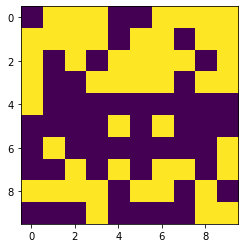

In [16]:
plt.imshow(tracker)

In [22]:
failures[0].shape

(51,)